# Autoencoders training

In [1]:
import numpy as np
import datetime
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import keras
from keras.callbacks import TensorBoard
from keras.datasets import mnist
import tensorflow as tf

from utils import *
from autoencoders import *

In [2]:
keras.backend.clear_session()
print("GPUs Available: ", tf.config.list_physical_devices('GPU'))
print(tf.test.is_built_with_cuda())

GPUs Available:  [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
True


In [3]:
w_length = 200
w_increment = 100

path = 'D:\Documentos\Datasets\Grabaciones 1'

raw_data = loadRawData(path, w_length, w_increment)

AT_FE1.txt
AT_FE2.txt
AT_FE3.txt
AT_FE4.txt
AT_FE_EC1.txt
AT_FE_EC2.txt
AT_FE_FC1.txt
AT_FE_FC2.txt
AT_PS1.txt
AT_PS2.txt
AT_PS3.txt
AT_PS4.txt
AT_PS5.txt
AT_PS_PC1.txt
AT_PS_PC2.txt
AT_PS_SC1.txt
AT_PS_SC2.txt
JT_FE1.txt
JT_FE2.txt
JT_FE_EC1.txt
JT_FE_EC2.txt
JT_FE_FC1.txt
JT_FE_FC2.txt
JT_PS1.txt
JT_PS2.txt
JT_PS_PC1.txt
JT_PS_PC2.txt
JT_PS_SC1.txt
JT_PS_SC2.txt
SV_FE1.txt
SV_FE2.txt
SV_FE3.txt
SV_FE4.txt
SV_FE_EC1.txt
SV_FE_EC2.txt
SV_FE_FC1.txt
SV_FE_FC2.txt
SV_PS1.txt
SV_PS2.txt
SV_PS_PC1.txt
SV_PS_PC2.txt
SV_PS_SC1.txt
SV_PS_SC2.txt
Y_FE1.txt
Y_FE2.txt
Y_FE_EC1.txt
Y_FE_EC2.txt
Y_FE_FC1.txt
Y_FE_FC2.txt
Y_PS1.txt
Y_PS2.txt
Y_PS_PC1.txt
Y_PS_PC2.txt
Y_PS_SC1.txt
Y_PS_SC2.txt


In [4]:
emg_data = maf(raw_data)
w, c = emg_data[0].shape
ch = c - 1
print(emg_data[0].shape)

(200, 5)


In [5]:
emg_data_arr = np.array(emg_data)[:,:,0:4]

ascol = emg_data_arr.reshape(-1, ch)
sc = MinMaxScaler()
trans = sc.fit_transform(ascol)

emg_data_arr = trans.reshape(-1, w, ch)
print(emg_data_arr.shape)

(12408, 200, 4)


In [6]:
X_train, X_test = train_test_split(emg_data_arr, test_size=0.1)
print(X_train.shape)
print(X_test.shape)

(11167, 200, 4)
(1241, 200, 4)


In [7]:
X_train_flat = X_train.reshape(X_train.shape[0], w*ch)
X_test_flat = X_test.reshape(X_test.shape[0], w*ch)
print(X_train_flat.shape)
print(X_test_flat.shape)

(11167, 800)
(1241, 800)


In [8]:
autoencoders_names = []
autoencoders_train_mae = []
autoencoders_test_mae = []

# Deep Autoencoder

In [9]:
ann_encoder = ann_encoder(64)
ann_decoder = ann_decoder(w*ch)
deep_autoencoder = autoencoder(ann_encoder, ann_decoder, (w*ch,))

In [10]:
deep_autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['mae'])
deep_autoencoder.summary()

Model: "Autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 800)]             0         
                                                                 
 Deep_encoder (Sequential)   (None, 64)                110784    
                                                                 
 Deep_decoder (Sequential)   (None, 800)               111520    
                                                                 
Total params: 222,304
Trainable params: 222,304
Non-trainable params: 0
_________________________________________________________________


In [11]:
# log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
# tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

history = deep_autoencoder.fit(X_train_flat, X_train_flat, epochs=100, batch_size=128, shuffle=True, validation_data=(X_test_flat, X_test_flat))

Epoch 1/100
88/88 [==============================] - 3s 11ms/step - loss: 0.2462 - mae: 0.1202 - val_loss: 0.1290 - val_mae: 0.0257
Epoch 2/100
88/88 [==============================] - 1s 9ms/step - loss: 0.1228 - mae: 0.0224 - val_loss: 0.1208 - val_mae: 0.0199
Epoch 3/100
88/88 [==============================] - 1s 9ms/step - loss: 0.1174 - mae: 0.0184 - val_loss: 0.1176 - val_mae: 0.0175
Epoch 4/100
88/88 [==============================] - 1s 8ms/step - loss: 0.1160 - mae: 0.0175 - val_loss: 0.1171 - val_mae: 0.0170
Epoch 5/100
88/88 [==============================] - 1s 9ms/step - loss: 0.1154 - mae: 0.0171 - val_loss: 0.1158 - val_mae: 0.0159
Epoch 6/100
88/88 [==============================] - 1s 9ms/step - loss: 0.1128 - mae: 0.0145 - val_loss: 0.1136 - val_mae: 0.0138
Epoch 7/100
88/88 [==============================] - 1s 9ms/step - loss: 0.1114 - mae: 0.0130 - val_loss: 0.1124 - val_mae: 0.0121
Epoch 8/100
88/88 [==============================] - 1s 9ms/step - loss: 0.1103 - 

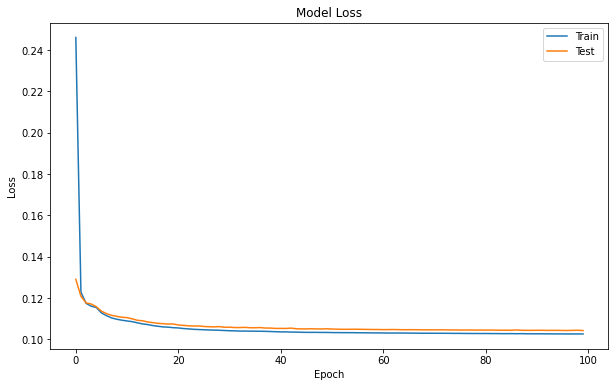

In [12]:
plotLoss(history)

In [13]:
autoencoders_names.append('Deep Autoencoder')
autoencoders_train_mae.append(deep_autoencoder.evaluate(X_train_flat, X_train_flat)[1])
autoencoders_test_mae.append(deep_autoencoder.evaluate(X_test_flat, X_test_flat)[1])

39/39 [==============================] - 0s 5ms/step - loss: 0.1042 - mae: 0.0054


1/1 [==============================] - 0s 152ms/step


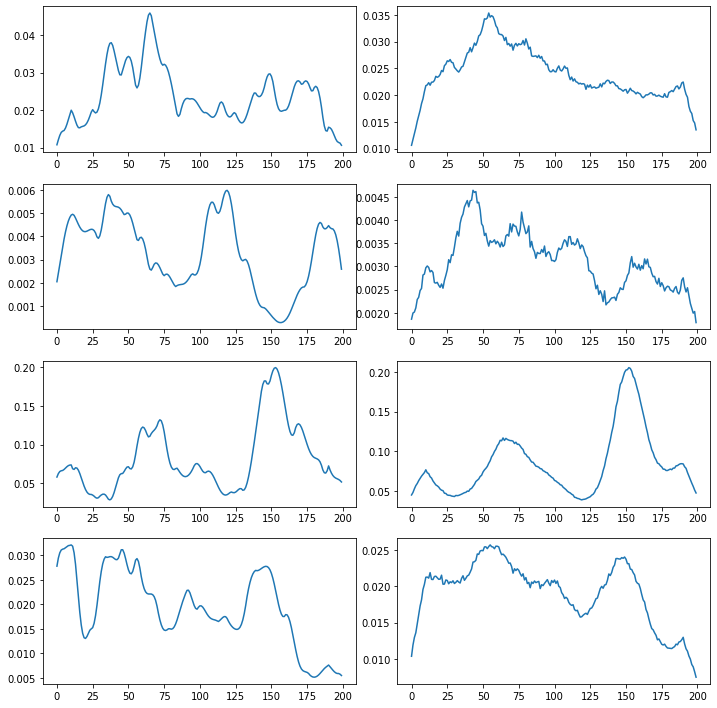

In [14]:
fig, axs = plt.subplots(4, 2, figsize=(10,10))
fig.tight_layout()

sample = 0

real_data = X_test_flat.reshape(X_test_flat.shape[0], w, ch)[sample,:,:]

axs[0,0].plot(real_data[:,0])
axs[1,0].plot(real_data[:,1])
axs[2,0].plot(real_data[:,2])
axs[3,0].plot(real_data[:,3])

deco_data = deep_autoencoder.predict(X_test_flat[sample,:].reshape(1, X_test_flat.shape[1]))
deco_data = deco_data.reshape(1, w, ch)[0,:,:]

axs[0,1].plot(deco_data[:,0])
axs[1,1].plot(deco_data[:,1])
axs[2,1].plot(deco_data[:,2])
axs[3,1].plot(deco_data[:,3])


# Convolutional Autoencoder

In [15]:
cnn_encoder = cnn_encoder((2,2))
cnn_decoder = cnn_decoder()
cnn_autoencoder = autoencoder(cnn_encoder, cnn_decoder, (w,ch,1))

In [16]:
cnn_autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['mae'])
cnn_autoencoder.summary()

Model: "Autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 200, 4, 1)]       0         
                                                                 
 Convolutional_encoder (Sequ  (None, 100, 2, 16)       80        
 ential)                                                         
                                                                 
 Convolutional_decoder (Sequ  (None, 200, 4, 1)        553       
 ential)                                                         
                                                                 
Total params: 633
Trainable params: 633
Non-trainable params: 0
_________________________________________________________________


In [17]:
# log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
# tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

history = cnn_autoencoder.fit(X_train, X_train, epochs=100, batch_size=128, shuffle=True, validation_data=(X_test, X_test))

Epoch 1/100
88/88 [==============================] - 11s 16ms/step - loss: 0.1289 - mae: 0.0281 - val_loss: 0.1119 - val_mae: 0.0172
Epoch 2/100
88/88 [==============================] - 1s 10ms/step - loss: 0.1081 - mae: 0.0152 - val_loss: 0.1081 - val_mae: 0.0139
Epoch 3/100
88/88 [==============================] - 1s 9ms/step - loss: 0.1062 - mae: 0.0134 - val_loss: 0.1073 - val_mae: 0.0129
Epoch 4/100
88/88 [==============================] - 1s 10ms/step - loss: 0.1057 - mae: 0.0127 - val_loss: 0.1070 - val_mae: 0.0124
Epoch 5/100
88/88 [==============================] - 1s 10ms/step - loss: 0.1056 - mae: 0.0124 - val_loss: 0.1070 - val_mae: 0.0123
Epoch 6/100
88/88 [==============================] - 1s 9ms/step - loss: 0.1054 - mae: 0.0122 - val_loss: 0.1067 - val_mae: 0.0120
Epoch 7/100
88/88 [==============================] - 1s 9ms/step - loss: 0.1053 - mae: 0.0120 - val_loss: 0.1066 - val_mae: 0.0118
Epoch 8/100
88/88 [==============================] - 1s 10ms/step - loss: 0.10

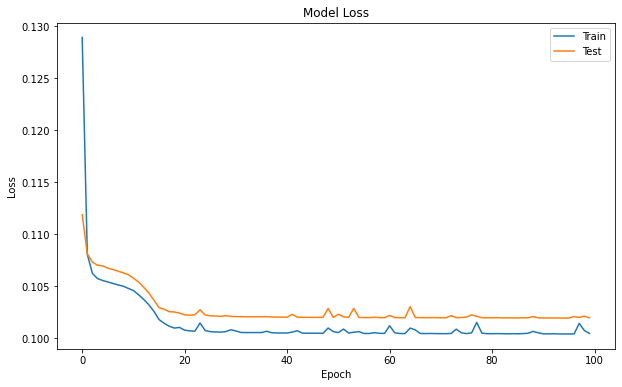

In [18]:
plotLoss(history)

In [19]:
autoencoders_names.append('CNN Autoencoder')
autoencoders_train_mae.append(cnn_autoencoder.evaluate(X_train, X_train)[1])
autoencoders_test_mae.append(cnn_autoencoder.evaluate(X_test, X_test)[1])

39/39 [==============================] - 0s 9ms/step - loss: 0.1020 - mae: 0.0018


1/1 [==============================] - 0s 275ms/step


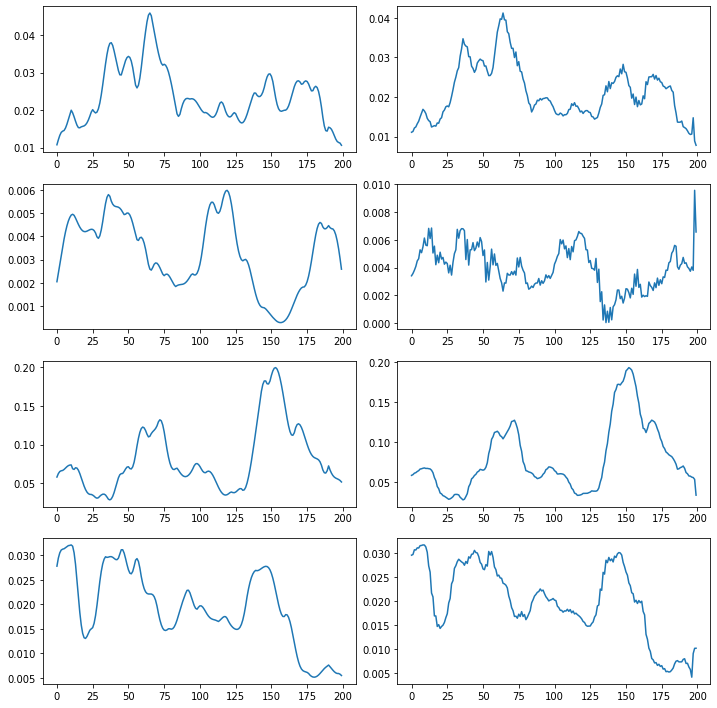

In [20]:
fig, axs = plt.subplots(4, 2, figsize=(10,10))
fig.tight_layout()

sample = 0

real_data = X_test[sample,:,:]

axs[0,0].plot(real_data[:,0])
axs[1,0].plot(real_data[:,1])
axs[2,0].plot(real_data[:,2])
axs[3,0].plot(real_data[:,3])

deco_data = cnn_autoencoder.predict(X_test[sample,:,:].reshape(1, w, ch, 1))
deco_data = deco_data.reshape(1, w, ch)[0,:,:]

axs[0,1].plot(deco_data[:,0])
axs[1,1].plot(deco_data[:,1])
axs[2,1].plot(deco_data[:,2])
axs[3,1].plot(deco_data[:,3])

# Sequence to Sequence Autoencoder

In [21]:
lstm_encoder = lstm_encoder(64)
lstm_decoder = lstm_decoder(w, ch)
lstm_autoencoder = autoencoder(lstm_encoder, lstm_decoder, (w,ch))

In [22]:
lstm_autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['mae'])
lstm_autoencoder.summary()

Model: "Autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 200, 4)]          0         
                                                                 
 sts_encoder (Sequential)    (None, 64)                14848     
                                                                 
 sts_decoder (Sequential)    (None, 200, 4)            1104      
                                                                 
Total params: 15,952
Trainable params: 15,952
Non-trainable params: 0
_________________________________________________________________


In [23]:
history = lstm_autoencoder.fit(X_train, X_train, epochs=100, batch_size=256, shuffle=True, validation_data=(X_test, X_test))

Epoch 1/100
44/44 [==============================] - 11s 112ms/step - loss: 0.1193 - mae: 0.0210 - val_loss: 0.1122 - val_mae: 0.0170
Epoch 2/100
44/44 [==============================] - 4s 81ms/step - loss: 0.1090 - mae: 0.0156 - val_loss: 0.1092 - val_mae: 0.0145
Epoch 3/100
44/44 [==============================] - 4s 87ms/step - loss: 0.1071 - mae: 0.0137 - val_loss: 0.1082 - val_mae: 0.0133
Epoch 4/100
44/44 [==============================] - 4s 84ms/step - loss: 0.1064 - mae: 0.0130 - val_loss: 0.1077 - val_mae: 0.0129
Epoch 5/100
44/44 [==============================] - 4s 80ms/step - loss: 0.1058 - mae: 0.0124 - val_loss: 0.1071 - val_mae: 0.0122
Epoch 6/100
44/44 [==============================] - 4s 83ms/step - loss: 0.1054 - mae: 0.0119 - val_loss: 0.1068 - val_mae: 0.0114
Epoch 7/100
44/44 [==============================] - 4s 83ms/step - loss: 0.1049 - mae: 0.0112 - val_loss: 0.1062 - val_mae: 0.0110
Epoch 8/100
44/44 [==============================] - 4s 83ms/step - loss: 

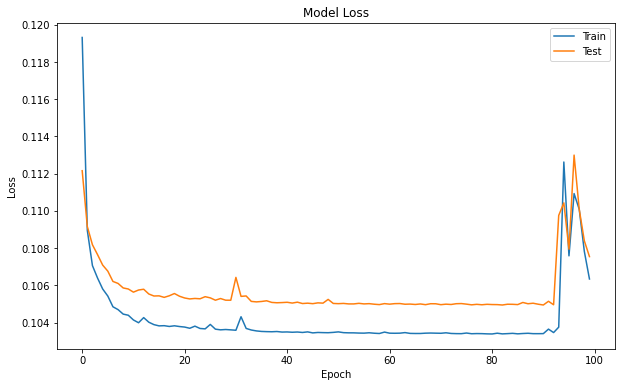

In [24]:
plotLoss(history)

In [25]:
autoencoders_names.append('LSTM Autoencoder')
autoencoders_train_mae.append(lstm_autoencoder.evaluate(X_train, X_train)[1])
autoencoders_test_mae.append(lstm_autoencoder.evaluate(X_test, X_test)[1])

39/39 [==============================] - 1s 35ms/step - loss: 0.1075 - mae: 0.0124


1/1 [==============================] - 1s 992ms/step


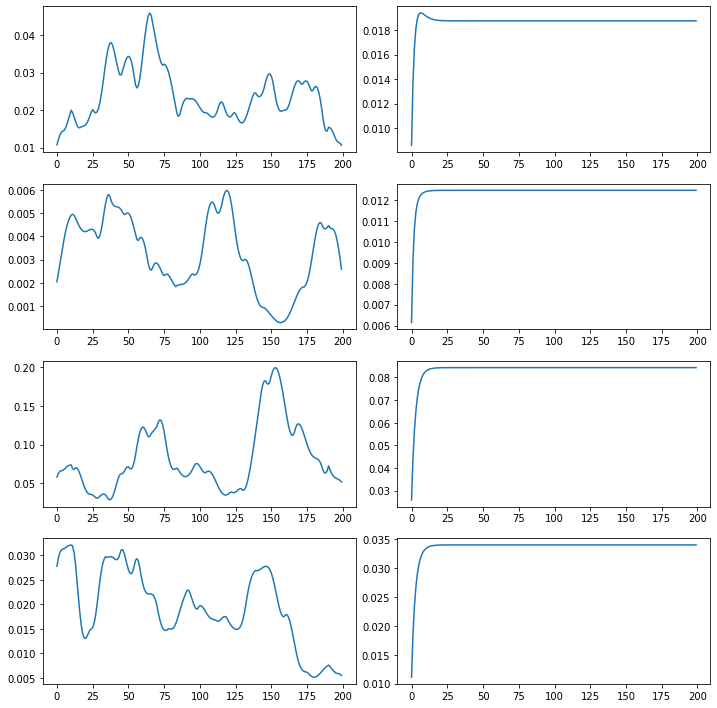

In [26]:
fig, axs = plt.subplots(4, 2, figsize=(10,10))
fig.tight_layout()

sample = 0

real_data = X_test[sample,:,:]

axs[0,0].plot(real_data[:,0])
axs[1,0].plot(real_data[:,1])
axs[2,0].plot(real_data[:,2])
axs[3,0].plot(real_data[:,3])

deco_data = lstm_autoencoder.predict(X_test[sample,:,:].reshape(1, w, ch))
deco_data = deco_data.reshape(1, w, ch)[0,:,:]

axs[0,1].plot(deco_data[:,0])
axs[1,1].plot(deco_data[:,1])
axs[2,1].plot(deco_data[:,2])
axs[3,1].plot(deco_data[:,3])

# Variational Autoencoder

In [27]:
vae_autoencoder, vae_encoder, vae_decoder = vae_autoencoder((w*ch,), w*ch, 128, 64)

In [28]:
vae_autoencoder.compile(optimizer='adam', metrics=['mae'])
vae_autoencoder.summary()

Model: "vae_autoencoder"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 800)]        0           []                               
                                                                                                  
 vae_encoder (Functional)       [(None, 64),         119040      ['input_4[0][0]']                
                                 (None, 64),                                                      
                                 (None, 64)]                                                      
                                                                                                  
 vae_decoder (Functional)       (None, 800)          111520      ['vae_encoder[0][2]']            
                                                                                    

In [29]:
history = vae_autoencoder.fit(X_train_flat, X_train_flat, epochs=100, batch_size=128, shuffle=True, validation_data=(X_test_flat, X_test_flat))

Epoch 1/100
88/88 [==============================] - 2s 14ms/step - loss: 229.5535 - mae: 0.1428 - val_loss: 93.8214 - val_mae: 0.0185
Epoch 2/100
88/88 [==============================] - 1s 12ms/step - loss: 90.3787 - mae: 0.0183 - val_loss: 91.1564 - val_mae: 0.0183
Epoch 3/100
88/88 [==============================] - 1s 12ms/step - loss: 89.9496 - mae: 0.0180 - val_loss: 90.8690 - val_mae: 0.0176
Epoch 4/100
88/88 [==============================] - 1s 12ms/step - loss: 89.4663 - mae: 0.0177 - val_loss: 90.0487 - val_mae: 0.0165
Epoch 5/100
88/88 [==============================] - 1s 12ms/step - loss: 87.9522 - mae: 0.0156 - val_loss: 88.4383 - val_mae: 0.0142
Epoch 6/100
88/88 [==============================] - 1s 12ms/step - loss: 86.3372 - mae: 0.0137 - val_loss: 87.1814 - val_mae: 0.0130
Epoch 7/100
88/88 [==============================] - 1s 12ms/step - loss: 85.5733 - mae: 0.0127 - val_loss: 87.1314 - val_mae: 0.0123
Epoch 8/100
88/88 [==============================] - 1s 12ms/

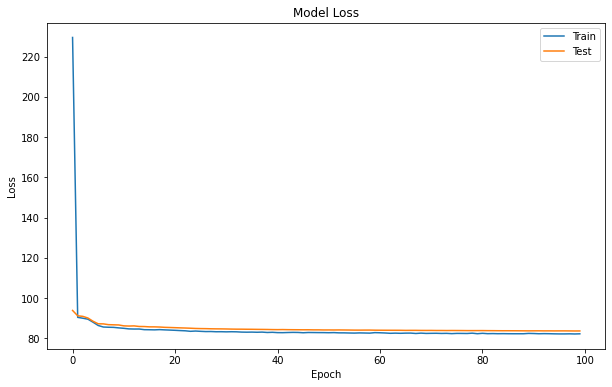

In [30]:
plotLoss(history)

In [31]:
autoencoders_names.append('VAE Autoencoder')
autoencoders_train_mae.append(vae_autoencoder.evaluate(X_train_flat, X_train_flat)[1])
autoencoders_test_mae.append(vae_autoencoder.evaluate(X_test_flat, X_test_flat)[1])

39/39 [==============================] - 0s 6ms/step - loss: 83.5796 - mae: 0.0073


1/1 [==============================] - 0s 168ms/step


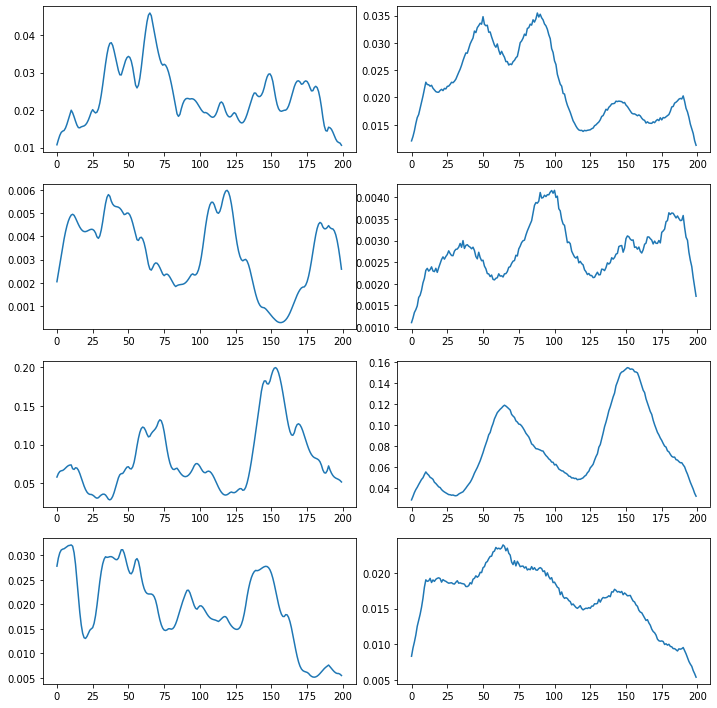

In [32]:
fig, axs = plt.subplots(4, 2, figsize=(10,10))
fig.tight_layout()

sample = 0

real_data = X_test_flat.reshape(X_test_flat.shape[0], w, ch)[sample,:,:]

axs[0,0].plot(real_data[:,0])
axs[1,0].plot(real_data[:,1])
axs[2,0].plot(real_data[:,2])
axs[3,0].plot(real_data[:,3])

deco_data = vae_autoencoder.predict(X_test_flat[sample,:].reshape(1, X_test_flat.shape[1]))
deco_data = deco_data.reshape(1, w, ch)[0,:,:]

axs[0,1].plot(deco_data[:,0])
axs[1,1].plot(deco_data[:,1])
axs[2,1].plot(deco_data[:,2])
axs[3,1].plot(deco_data[:,3])

# Autoencoders Comparison

In [34]:
autoencoders_comparison = pd.DataFrame(zip(autoencoders_names, autoencoders_train_mae, autoencoders_test_mae), columns=['Model', 'Train MAE', 'Test MAE'])

autoencoders_comparison = autoencoders_comparison.sort_values('Test MAE', ascending=True)
autoencoders_comparison

,Model,Train MAE,Test MAE
1,CNN Autoencoder,0.001824,0.001819
0,Deep Autoencoder,0.005071,0.005377
3,VAE Autoencoder,0.007046,0.007295
2,LSTM Autoencoder,0.012438,0.012444
